In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.preprocessing import StandardScaler

In [3]:
players = pd.read_csv('players_21.csv')

In [4]:
players.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,103500000.0,560000.0,33,...,52+3,52+3,52+3,62+3,19+3,https://cdn.sofifa.net/players/158/023/21_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",92,92,63000000.0,220000.0,35,...,54+3,54+3,54+3,61+3,20+3,https://cdn.sofifa.net/players/020/801/21_120.png,https://cdn.sofifa.net/teams/45/60.png,https://cdn.sofifa.net/flags/it.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
2,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,91,91,111000000.0,240000.0,31,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/21_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,NaN,https://cdn.sofifa.net/flags/pl.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,132000000.0,270000.0,28,...,49+3,49+3,49+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/21_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CAM, CM",91,91,129000000.0,370000.0,29,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/21_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [5]:
features = ['overall','potential','age','value_eur','wage_eur']

players = players[features]
players.head()

,overall,potential,age,value_eur,wage_eur
0,93,93,33,103500000.0,560000.0
1,92,92,35,63000000.0,220000.0
2,91,91,31,111000000.0,240000.0
3,91,91,28,132000000.0,270000.0
4,91,91,29,129000000.0,370000.0


In [6]:
data = players.copy()


In [7]:
data.shape

(18944, 5)

In [8]:
data.dropna(inplace=True)
data.shape

(18707, 5)

In [9]:
data.isnull().sum()

overall      0
potential    0
age          0
value_eur    0
wage_eur     0
dtype: int64

In [10]:
data.describe()

,overall,potential,age,value_eur,wage_eur
count,18707.000000,18707.000000,18707.000000,1.870700e+04,18707.000000
mean,65.634522,71.092693,25.167050,2.902288e+06,9151.718608
std,7.004841,6.112034,4.663618,7.743775e+06,19898.646261
min,47.000000,47.000000,16.000000,9.000000e+03,500.000000
25%,61.000000,67.000000,21.000000,4.750000e+05,1000.000000
50%,66.000000,71.000000,25.000000,9.750000e+05,3000.000000
75%,70.000000,75.000000,28.000000,2.000000e+06,8000.000000
max,93.000000,95.000000,43.000000,1.855000e+08,560000.000000


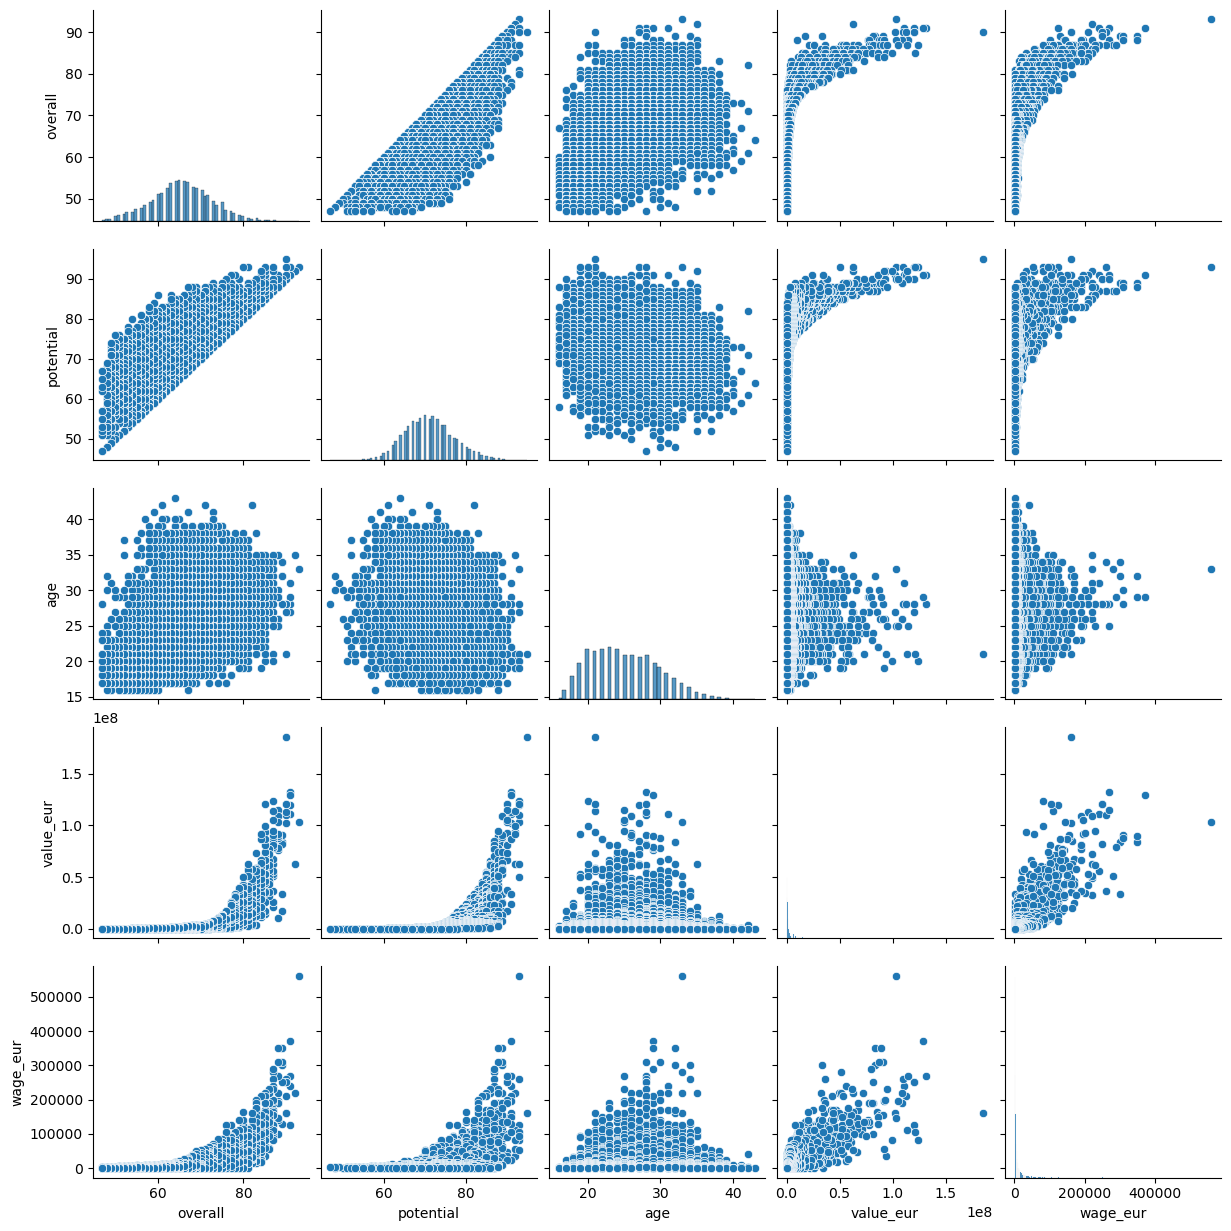

In [11]:
sns.pairplot(data[['overall','potential','age','value_eur','wage_eur']])

Text(0, 0.5, 'overall')

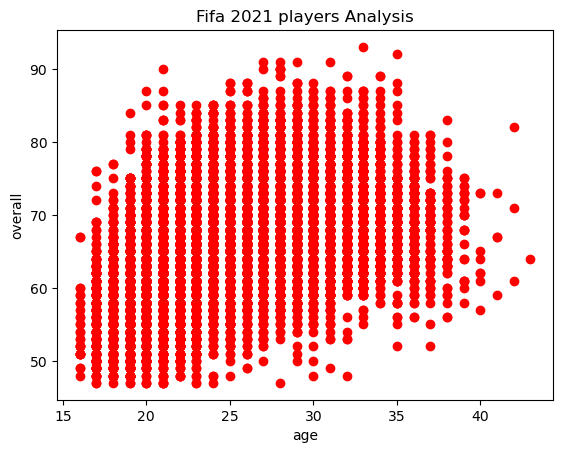

In [12]:
plt.scatter(data.age, data.overall, color='red')
plt.title('Fifa 2021 players Analysis')
plt.xlabel('age')
plt.ylabel('overall')

# KMeans

In [13]:
np.random.seed(42)  # Set a random seed for reproducibility and it help make standard of data0, data1 index values, otherwise it change if we don't use

In [14]:
km = KMeans(n_clusters=8)
km.fit(data[['age','overall']])
data['new_cluster'] = km.predict(data[['age','overall']])
data.head()


,overall,potential,age,value_eur,wage_eur,new_cluster
0,93,93,33,103500000.0,560000.0,6
1,92,92,35,63000000.0,220000.0,6
2,91,91,31,111000000.0,240000.0,6
3,91,91,28,132000000.0,270000.0,6
4,91,91,29,129000000.0,370000.0,6


In [15]:
data0 = data[data.new_cluster == 0]
data0.head()

,overall,potential,age,value_eur,wage_eur,new_cluster
5397,69,69,35,575000.0,10000.0,0
5398,69,69,34,450000.0,4000.0,0
5399,69,69,36,250000.0,14000.0,0
5401,69,69,36,450000.0,6000.0,0
5402,69,69,33,725000.0,8000.0,0


Text(0, 0.5, 'overall')

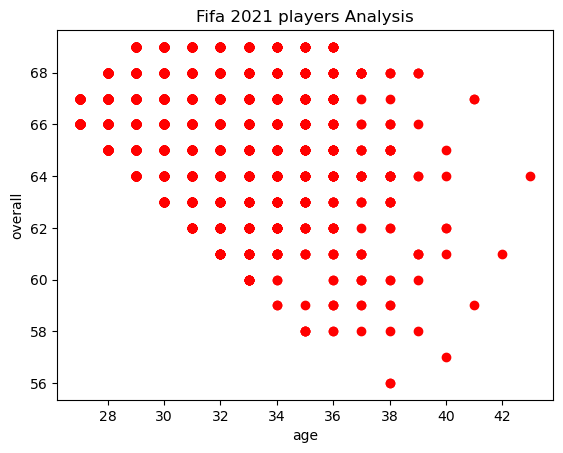

In [16]:
plt.scatter(data0.age, data0.overall, color='red')
plt.title('Fifa 2021 players Analysis')
plt.xlabel('age')
plt.ylabel('overall')


In [17]:
data0.shape

(2729, 6)

In [18]:
centroids = km.cluster_centers_
centroids

array([[30.95932576, 65.93257604],
       [20.56220578, 59.78076664],
       [24.90089197, 71.31516353],
       [31.57877095, 73.03854749],
       [19.86497175, 53.19491525],
       [26.73295985, 61.72502334],
       [26.82506527, 79.64577894],
       [22.39731286, 65.77543186]])

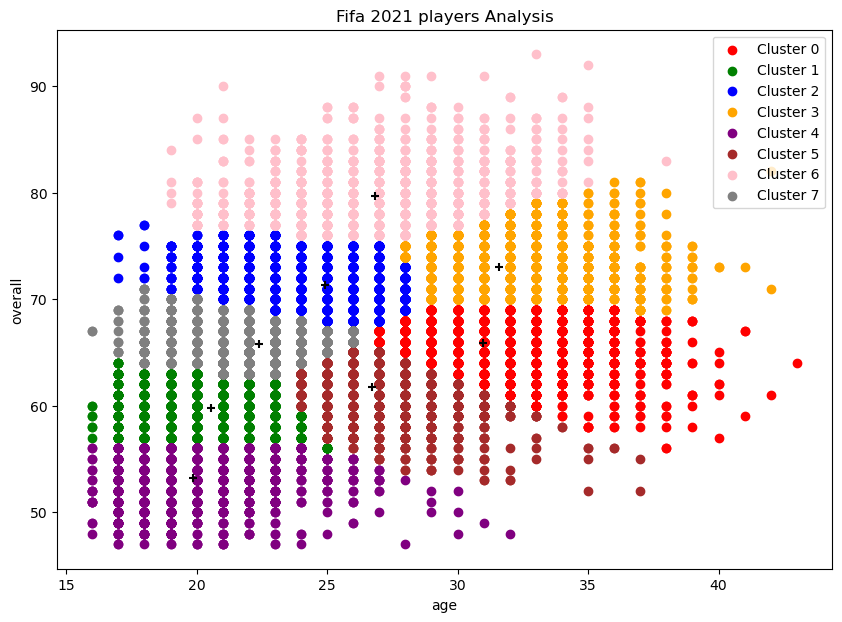

In [19]:
cluster_data = {}

for x in range(9):
    cluster_data[x] = data[data.new_cluster == x]

plt.figure(figsize=(10, 7))

colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink', 'gray']
cluster_labels = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6', 'Cluster 7']

for i in range(8):
    plt.scatter(cluster_data[i]['age'], cluster_data[i]['overall'], color=colors[i], label=cluster_labels[i])

plt.scatter(centroids[:, 0], centroids[:, 1], marker='+', color='black')

plt.title('Fifa 2021 players Analysis')
plt.legend()
plt.xlabel('age')
plt.ylabel('overall')

plt.show()


In [20]:
wcss = []
cluster_range = range(1,11)

for k in cluster_range:
    km1 = KMeans(n_clusters=k)
    km1.fit(data[['age','overall']])
    wcss.append(km1.inertia_)
wcss

[1324705.1952744932,
 648330.2767306138,
 455554.5557083097,
 339107.0626700792,
 278460.44497400505,
 233741.47405819956,
 205390.20010351005,
 183700.52340218535,
 161177.4662745305,
 147177.64510631372]

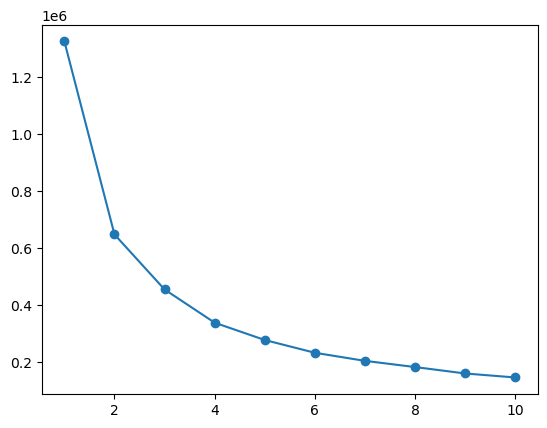

In [21]:
plt.plot(cluster_range, wcss, marker='o')


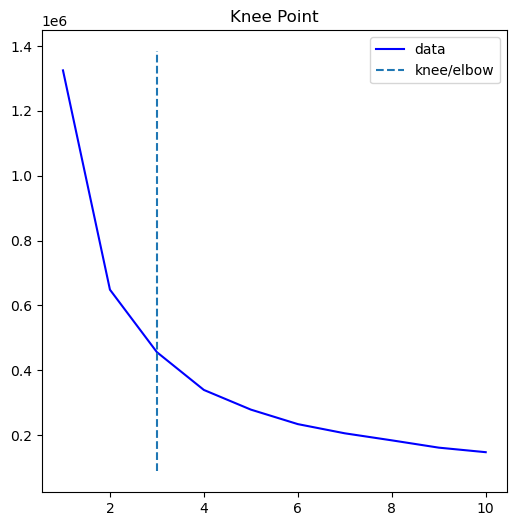

In [22]:
kn = KneeLocator(cluster_range, wcss, curve='convex', direction='decreasing')
kn.plot_knee()

In [23]:
kn.knee

3

In [24]:
km2 = KMeans(n_clusters=3)
km2.fit(data[['age','overall']])
data['optimal_cluster'] = km2.predict(data[['age','overall']])
data.head()

,overall,potential,age,value_eur,wage_eur,new_cluster,optimal_cluster
0,93,93,33,103500000.0,560000.0,6,2
1,92,92,35,63000000.0,220000.0,6,2
2,91,91,31,111000000.0,240000.0,6,2
3,91,91,28,132000000.0,270000.0,6,2
4,91,91,29,129000000.0,370000.0,6,2


In [25]:
centroids1 = km2.cluster_centers_
centroids1

array([[20.71718836, 57.77649643],
       [26.51309815, 65.7807661 ],
       [27.9056928 , 74.58668099]])

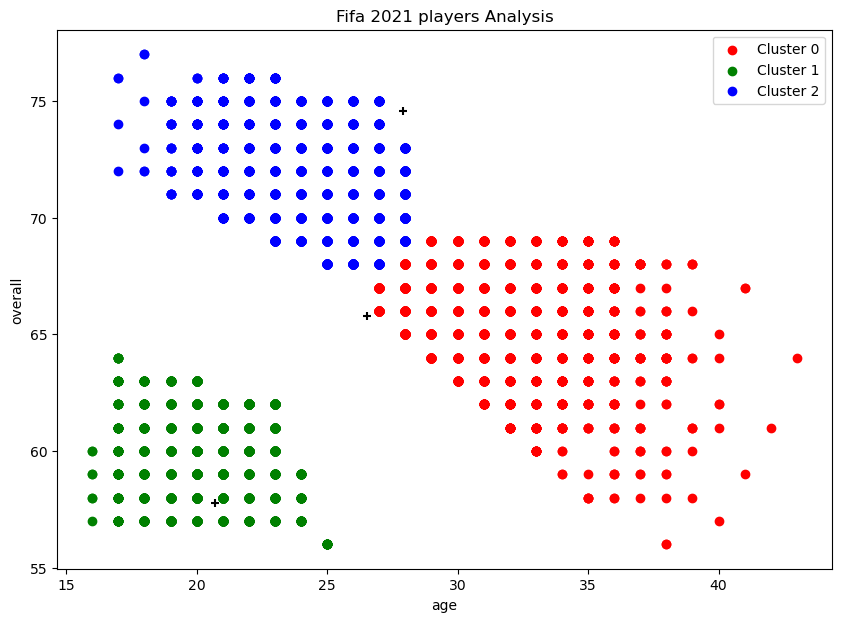

In [26]:
cluster_data = {}

for x in range(4):
    cluster_data[x] = data[data.new_cluster == x]

plt.figure(figsize=(10, 7))

colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink', 'gray']
cluster_labels = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6', 'Cluster 7']

for i in range(3):
    plt.scatter(cluster_data[i]['age'], cluster_data[i]['overall'], color=colors[i], label=cluster_labels[i])

plt.scatter(centroids1[:, 0], centroids1[:, 1], marker='+', color='black')

plt.title('Fifa 2021 players Analysis')
plt.legend()
plt.xlabel('age')
plt.ylabel('overall')

plt.show()

# Linear Regression

In [27]:
features = ['age','overall']
data1 = data[features]
data1.head()

,age,overall
0,33,93
1,35,92
2,31,91
3,28,91
4,29,91


In [28]:
data1.shape #the data set is too big

(18707, 2)

In [29]:
sample = 100
subset = data1.sample(sample, random_state=42)
subset.head()

,age,overall
57,27,86
8993,25,66
2733,26,73
13517,20,62
7287,23,68


In [30]:
subset.shape

(100, 2)

In [31]:
x = subset[['age']]
x.head()

,age
57,27
8993,25
2733,26
13517,20
7287,23


In [ ]:
x.shape

In [32]:
y = subset['overall']
y.head()

57       86
8993     66
2733     73
13517    62
7287     68
Name: overall, dtype: int64

In [ ]:
y.shape

Text(0, 0.5, 'overall')

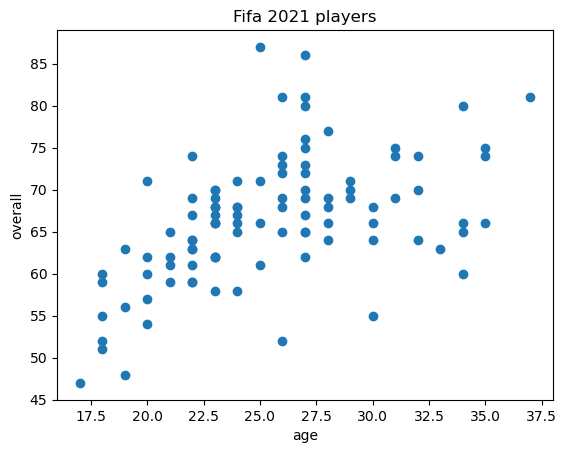

In [33]:
plt.scatter(x,y)
plt.title('Fifa 2021 players')
plt.xlabel('age')
plt.ylabel('overall')

In [34]:
x.mean()

age    25.41
dtype: float64

In [35]:
y.mean()

66.45

In [37]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state=42)

In [38]:
xtrain.head()

,age
4604,32
13374,27
14256,25
1651,27
17754,18


In [39]:
xtrain.shape

(70, 1)

In [40]:
ytrain.head()

4604     70
13374    62
14256    61
1651     75
17754    55
Name: overall, dtype: int64

In [41]:
ytrain.shape

(70,)

In [42]:
xtest.head()

,age
2696,27
6583,30
426,27
322,27
11622,30


In [43]:
xtest.shape

(30, 1)

In [44]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(xtrain,ytrain)

LinearRegression()

In [45]:
reg.coef_

array([0.77180642])

In [46]:
reg.intercept_

46.28835115362971

In [47]:
ytest.head(10)


2696     73
6583     68
426      80
322      81
11622    64
14201    61
7804     67
8203     67
15674    59
57       86
Name: overall, dtype: int64

In [48]:
xtest.head(10)

,age
2696,27
6583,30
426,27
322,27
11622,30
14201,21
7804,27
8203,22
15674,22
57,27


In [49]:
pred = reg.predict(xtest)

In [50]:
pred

array([67.12712437, 69.44254361, 67.12712437, 67.12712437, 69.44254361,
       62.49628588, 67.12712437, 63.26809229, 63.26809229, 67.12712437,
       61.72447946, 68.6707372 , 64.03989871, 73.30157569, 64.81170512,
       64.03989871, 72.52976927, 69.44254361, 67.12712437, 66.35531795,
       63.26809229, 66.35531795, 67.89893078, 59.40906021, 61.72447946,
       68.6707372 , 60.18086663, 64.03989871, 66.35531795, 62.49628588])

In [51]:
reg.score(xtest, ytest)

0.22997497476679063

Text(0, 0.5, 'overall')

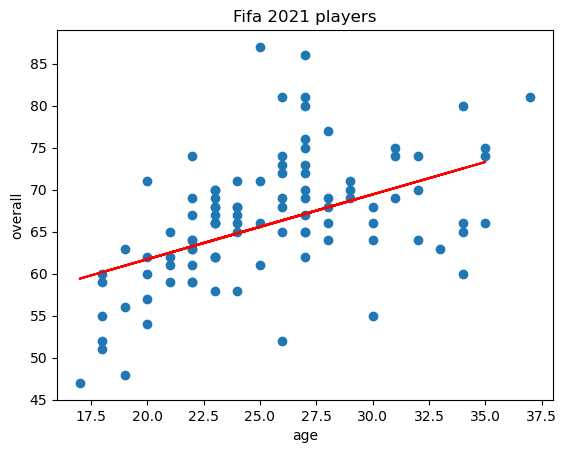

In [52]:
plt.plot(xtest, pred, color='red')
plt.scatter(x,y)
plt.title('Fifa 2021 players')
plt.xlabel('age')
plt.ylabel('overall')

In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(ytest, pred)
mae

5.391579441005441

In [54]:
mse = mean_squared_error(ytest, pred)

In [55]:
mse

51.65071194255957